In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import hashlib
import sklearn as sk
import os
import time
import datetime
import seaborn as sns

/home/catherinej/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:

from platform import python_version
print(python_version())

3.6.7


In [3]:
path = '/home/catherinej/Downloads'
datafile = os.path.join(path, 'IrmaMudThicknessComparisons (1).xlsx')
df = pd.read_excel(datafile)

# df = df.set_index(['Site', 'Station'])
df.head()

,Region,Site,Station,Date 1,Date 2,Date 3,ThickD1,ThickD2,ThickD3,Lat,Lon,Notes
0,TTI,CCB,CC1 S1,2017-12-20,2018-01-28,2018-06-20,0,0.0,0,26.022383,-81.734267,NaN
1,TTI,CCB,CC1 S2,2017-12-20,NaT,2018-06-20,0,NaN,0,26.022400,-81.734233,NaN
2,TTI,CCB,CC1 S3,2017-12-20,NaT,2018-06-20,0,NaN,0,26.022300,-81.734267,NaN
3,TTI,CCB,CC1 S4,2017-12-20,NaT,NaT,0,NaN,NaN,26.022317,-81.734183,NaN
4,TTI,CCB,CC2 S1,2017-12-20,2018-01-28,2018-06-20,0,0.0,0,26.022017,-81.734150,NaN


In [4]:
df = (df.replace('<0.1', 0)
        .replace('<1', 0.5)
        .drop('Notes', axis=1)
        )
df.head()

,Region,Site,Station,Date 1,Date 2,Date 3,ThickD1,ThickD2,ThickD3,Lat,Lon
0,TTI,CCB,CC1 S1,2017-12-20,2018-01-28,2018-06-20,0.0,0.0,0.0,26.022383,-81.734267
1,TTI,CCB,CC1 S2,2017-12-20,NaT,2018-06-20,0.0,NaN,0.0,26.022400,-81.734233
2,TTI,CCB,CC1 S3,2017-12-20,NaT,2018-06-20,0.0,NaN,0.0,26.022300,-81.734267
3,TTI,CCB,CC1 S4,2017-12-20,NaT,NaT,0.0,NaN,NaN,26.022317,-81.734183
4,TTI,CCB,CC2 S1,2017-12-20,2018-01-28,2018-06-20,0.0,0.0,0.0,26.022017,-81.734150


In [5]:
df = df[((df['ThickD1'] > df['ThickD2']) & (df['ThickD2'] >  df['ThickD3']))]
hurricane_date = pd.to_datetime('9/10/2017', format='%m/%d/%Y')

diff1 = []
diff2 = []
diff3 = []
for value in df['Date 1']:
    diff = value - hurricane_date
    diff1.append(diff)
df['DiffTime1'] = diff1
df['DiffTime1'] = df['DiffTime1'] / np.timedelta64(1, 'D')

for value in df['Date 2']:
    diff = value - hurricane_date
    diff2.append(diff)
df['DiffTime2'] = diff2
df['DiffTime2'] = df['DiffTime2'] / np.timedelta64(1, 'D')

for value in df['Date 3']:
    diff = value - hurricane_date
    diff3.append(diff)
df['DiffTime3'] = diff3
df['DiffTime3'] = df['DiffTime3'] / np.timedelta64(1, 'D')
df

,Region,Site,Station,Date 1,Date 2,Date 3,ThickD1,ThickD2,ThickD3,Lat,Lon,DiffTime1,DiffTime2,DiffTime3
13,TTI,BW2,BW2 S2,2017-12-19,2018-01-28,2018-06-20,11.0,6.5,2.0,25.92488,-81.60933,100.0,140.0,283.0
21,TTI,BW2,BW2 S10,2017-12-19,2018-01-28,2018-06-20,6.0,5.5,4.5,25.92484,-81.60934,100.0,140.0,283.0
37,TTI,UFU,UFU MUD 4,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,25.90208,-81.51088,99.0,139.0,282.0
38,TTI,UFU,UFU MUD 5,2017-12-18,2018-01-27,2018-06-19,4.0,1.5,0.0,25.90203,-81.51088,99.0,139.0,282.0
55,TTI,FBTBM,FB 2,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,NaN,NaN,99.0,139.0,282.0
56,TTI,FBTBM,FB 3,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,NaN,NaN,99.0,139.0,282.0
62,TTI,FBTBM,FB 9,2017-12-18,2018-01-27,2018-06-19,2.0,0.5,0.0,NaN,NaN,99.0,139.0,282.0
63,TTI,FBTBM,FB 10,2017-12-18,2018-01-27,2018-06-19,3.0,2.0,0.0,NaN,NaN,99.0,139.0,282.0
107,LFK,LAD,S5,2017-11-18,2018-03-14,2018-06-15,5.0,1.5,0.0,24.66183,-81.61077,69.0,185.0,278.0
126,LFK,WTZ,S9,2017-11-19,2018-03-14,2018-06-15,0.3,0.2,0.0,24.64770,-81.65384,70.0,185.0,278.0


In [6]:
X = df[['DiffTime1', 'DiffTime2', 'DiffTime3']]
y = df[['ThickD1', 'ThickD2',
       'ThickD3']]


In [7]:
X

,DiffTime1,DiffTime2,DiffTime3
13,100.0,140.0,283.0
21,100.0,140.0,283.0
37,99.0,139.0,282.0
38,99.0,139.0,282.0
55,99.0,139.0,282.0
56,99.0,139.0,282.0
62,99.0,139.0,282.0
63,99.0,139.0,282.0
107,69.0,185.0,278.0
126,70.0,185.0,278.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_


array([-948.88561215, -829.43190349, -562.39231457])

In [10]:
print('(Linear Regression) linear model coeff (w):\n{}'
     .format(lin_reg.coef_))
# print('(poly deg 2) linear model intercept (b): {:.3f}'
#      .format(lin_reg.intercept_))
print('(Linear Regression) R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('(Linear Regression) R-squared score (test): {:.3f}\n'
     .format(lin_reg.score(X_test, y_test)))

(Linear Regression) linear model coeff (w):
[[2.06121537 1.55183199 1.88695264]
 [1.81534853 1.33398123 1.65067024]
 [1.23145666 0.90035746 1.11818588]]
(Linear Regression) R-squared score (training): 0.827
(Linear Regression) R-squared score (test): -12.987



In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state=0)

In [12]:
lin_reg.fit(X_train_poly, y_train_poly)
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(lin_reg.coef_))
# print('(poly deg 2) linear model intercept (b): {:.3f}'
#      .format(lin_reg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train_poly, y_train_poly)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(lin_reg.score(X_test_poly, y_test_poly)))

(poly deg 2) linear model coeff (w):
[[ 8.17347225e+06 -8.63176048e+05 -1.31751922e+06 -2.36857562e+06
  -3.29045248e+08 -1.14980557e+08 -1.76460691e+08  1.05483028e+08
  -3.05741904e+08  4.60117184e+08]
 [ 1.63469445e+06 -1.72635210e+05 -2.63503843e+05 -4.73715124e+05
  -6.58090495e+07 -2.29961113e+07 -3.52921381e+07  2.10966055e+07
  -6.11483807e+07  9.20234368e+07]
 [-4.08673612e+06  4.31588024e+05  6.58759608e+05  1.18428781e+06
   1.64522624e+08  5.74902783e+07  8.82303453e+07 -5.27415138e+07
   1.52870952e+08 -2.30058592e+08]]
(poly deg 2) R-squared score (training): 0.849
(poly deg 2) R-squared score (test): -4944733798849208909824.000



In [13]:
# X.hist() ###all data fromn first day what is teh distribution of values
x_axis = df['ThickD1']
x_axis.count()

10

In [14]:
x_axis

13     11.0
21      6.0
37      3.0
38      4.0
55      3.0
56      3.0
62      2.0
63      3.0
107     5.0
126     0.3
Name: ThickD1, dtype: float64

<IPython.core.display.Javascript object>


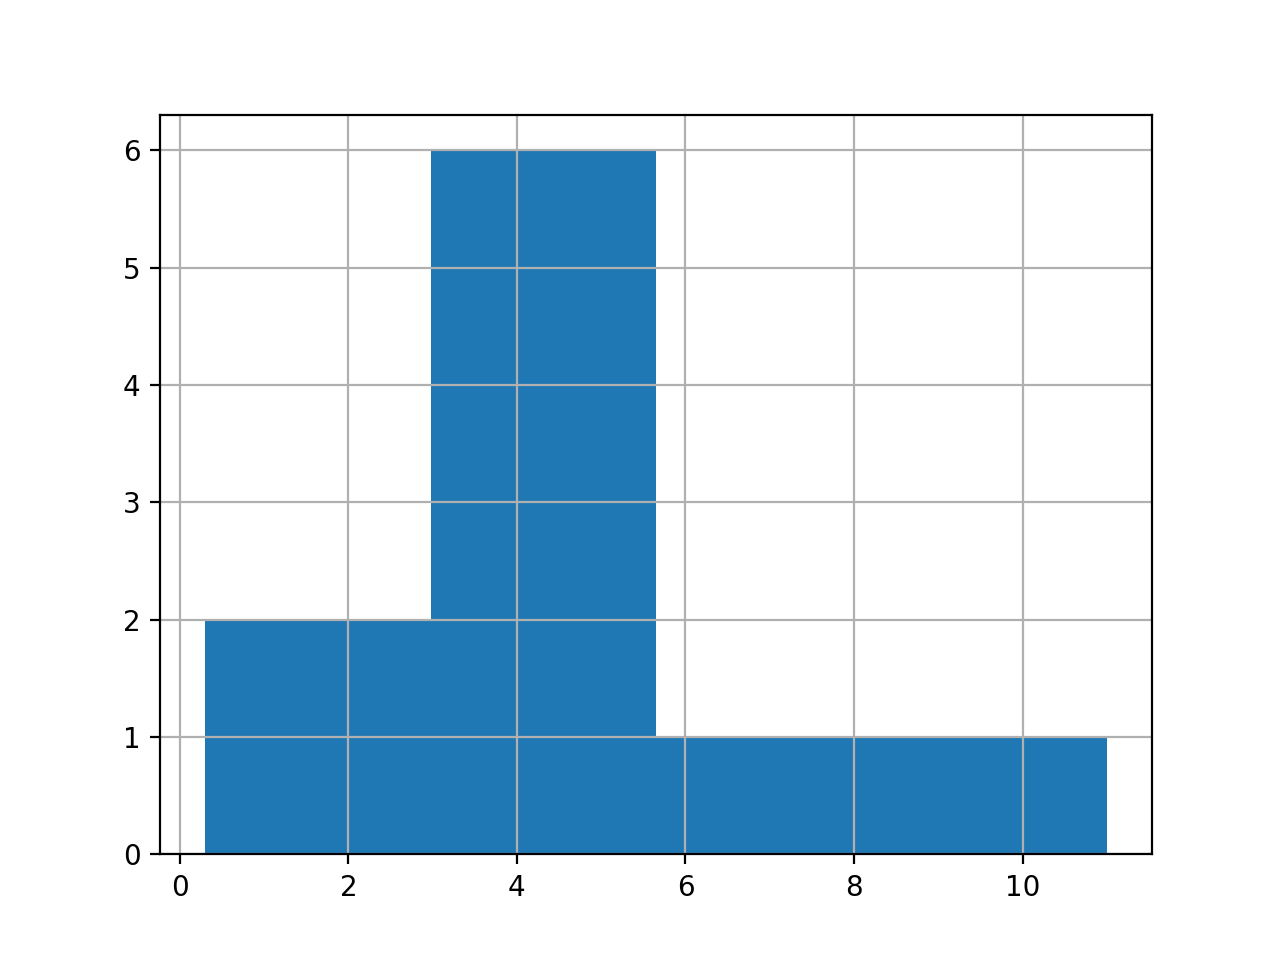

In [15]:

x_axis.hist(bins=4)

In [27]:
# plt.figure()
x2_axis = df['ThickD2']
x2_axis.hist(bins=4)

x3_axis = df['ThickD3']
x3_axis.hist(bins=4)

In [16]:
# df = df.where(df['ThickD1'] <= 3.0)
# df

In [17]:
df1 = df.copy()
msk = df1.where(
        (df1.ThickD1 >= 3) & (df1.ThickD1 <= 6)
        & (df1.ThickD2 <= 2) & (df1.ThickD3 <= 1.2))

msk1 = msk.drop(['Lat', 'Lon'], axis=1)
msk1 = msk1.dropna()
msk1

,Region,Site,Station,Date 1,Date 2,Date 3,ThickD1,ThickD2,ThickD3,DiffTime1,DiffTime2,DiffTime3
37,TTI,UFU,UFU MUD 4,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,99.0,139.0,282.0
38,TTI,UFU,UFU MUD 5,2017-12-18,2018-01-27,2018-06-19,4.0,1.5,0.0,99.0,139.0,282.0
55,TTI,FBTBM,FB 2,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,99.0,139.0,282.0
56,TTI,FBTBM,FB 3,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,99.0,139.0,282.0
63,TTI,FBTBM,FB 10,2017-12-18,2018-01-27,2018-06-19,3.0,2.0,0.0,99.0,139.0,282.0
107,LFK,LAD,S5,2017-11-18,2018-03-14,2018-06-15,5.0,1.5,0.0,69.0,185.0,278.0


In [18]:
x1 = df['ThickD1']
x2 = df['ThickD2']
x3 = df['ThickD3']

<IPython.core.display.Javascript object>


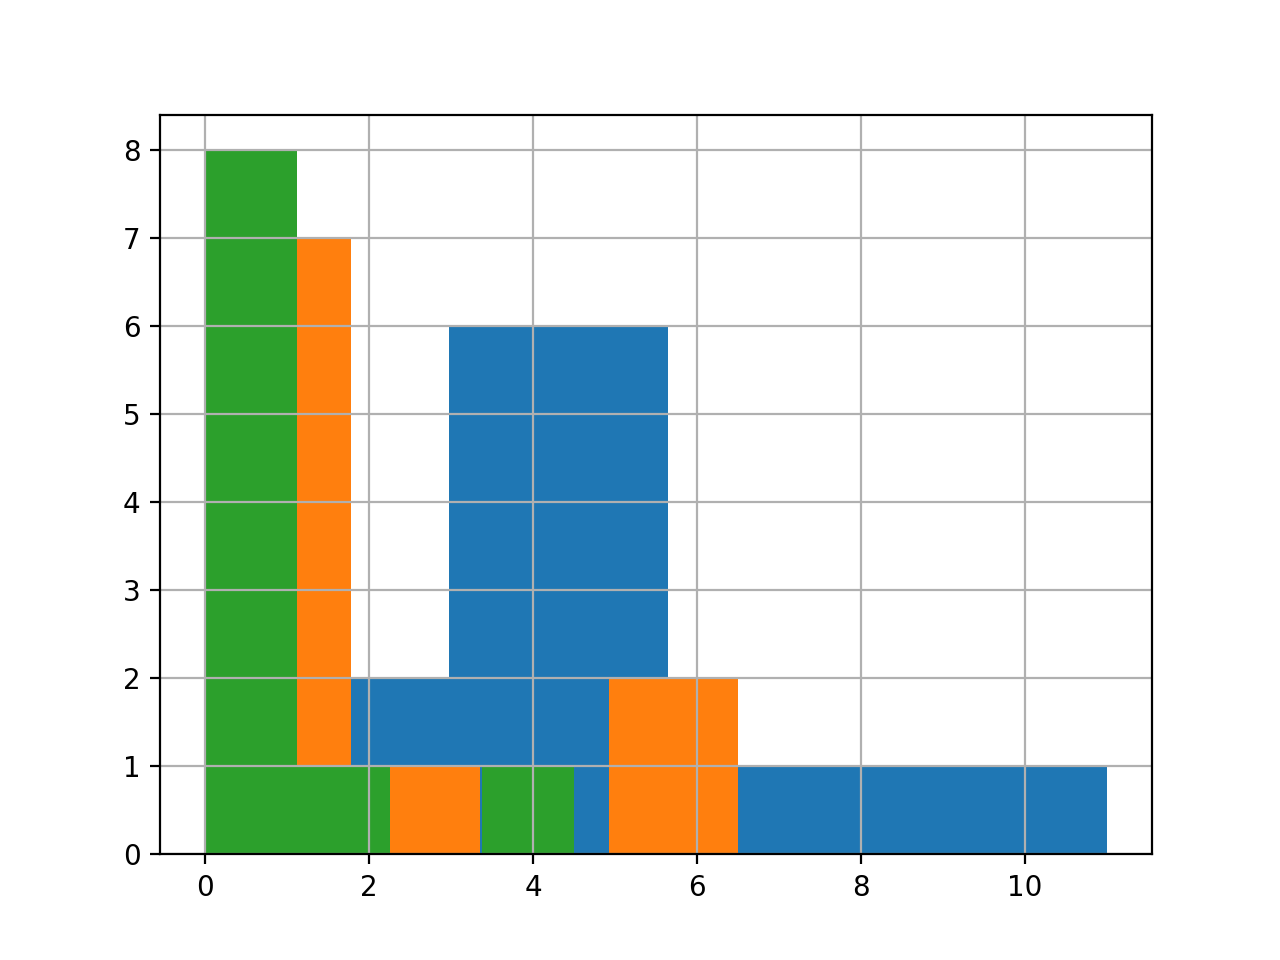

In [19]:
plt.figure()
x1.hist(bins=4)
x2.hist(bins=4)
x3.hist(bins=4)

In [53]:
thick = np.array(df['ThickD1'])
thick2 = np.array(df['ThickD2'])
thick3 = np.array(df['ThickD3'])


In [20]:
count_2_5 = 0
count_7_5 = 0
count_25 = 0
for i in thick:
    if i >= 2.5:
        count_2_5 +=1
    if i >= .75:
        count_7_5 +=1
    if i >= .25:
        count_25 += 1
count1 = (count_25, count_7_5, count_2_5)        
count2_2_5 = 0
count2_7_5 = 0
count2_25 = 0
for i in thick2:
    if i >= 2.5:
        count2_2_5 +=1
    if i >= .75:
        count2_7_5 +=1
    if i >= .25:
        count2_25 += 1
count2 = (count2_25, count2_7_5, count2_2_5)        
count3_2_5 = 0
count3_7_5 = 0
count3_25 = 0
for i in thick3:
    if i >= 2.5:
        count3_2_5 +=1
    if i >= .75:
        count3_7_5 +=1
    if i >= .25:
        count3_25 += 1
count3 = (count3_25, count3_7_5, count3_2_5)

NameError: name 'thick' is not defined

In [21]:
y_values = (.25, .75, 2.5)
print(count1, y_values)
plt.figure()
plt.plot(count1, y_values, color='b')
plt.plot(count2, y_values, color='r')
plt.plot(count3, y_values, color='y')

NameError: name 'count1' is not defined

In [22]:

X = msk1[['DiffTime1', 'DiffTime2', 'DiffTime3']]
y = msk1[['ThickD1', 'ThickD2',
       'ThickD3']]

print(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_
lin_reg.score(X_test, y_test)

     DiffTime1  DiffTime2  DiffTime3
37        99.0      139.0      282.0
38        99.0      139.0      282.0
55        99.0      139.0      282.0
56        99.0      139.0      282.0
63        99.0      139.0      282.0
107       69.0      185.0      278.0      ThickD1  ThickD2  ThickD3
37       3.0      1.0      0.0
38       4.0      1.5      0.0
55       3.0      1.0      0.0
56       3.0      1.0      0.0
63       3.0      2.0      0.0
107      5.0      1.5      0.0


-0.5441176470588235

In [31]:
X_train
time_df = (msk1['DiffTime1'].append(msk1['DiffTime2'])
                                     .append(msk1['DiffTime3']))
thick_df = (msk1['ThickD1'].append(msk1['ThickD2'])
                                     .append(msk1['ThickD3']))
df_train = pd.concat([time_df, thick_df], axis=1)
df_train.columns = ['Time', 'Thickness']
df_train
X1 = df_train['Time'].reshape
y1 = df_train['Thickness']
X1.info()
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)

AttributeError: 'Series' object has no attribute 'reshape'

In [40]:
lin_reg = LinearRegression()
# X1_train = X1_train.reshape(13, 1)
print(X1_train.shape, y1_train.shape)
X1_test = X1_test.values.reshape(len(X1_test), 1)
# X1_train = X1_train.values.reshape(13,1)
# y1_train.values.reshape(13,1)
lin_reg.fit(X1_train, y1_train)
lin_reg.intercept_
prediction = lin_reg.predict(X1_test)

(13, 1) (13,)


<IPython.core.display.Javascript object>


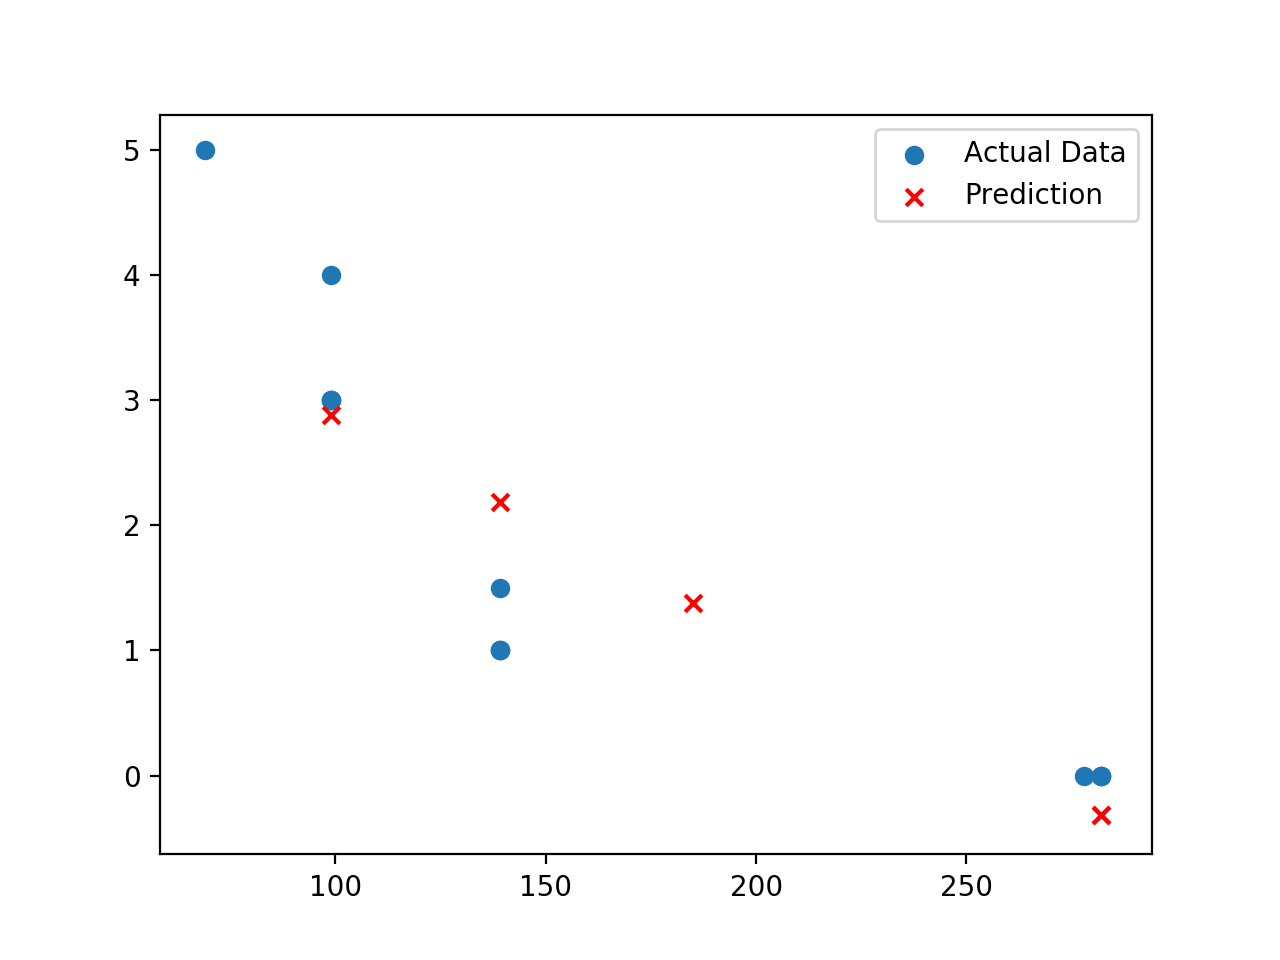

In [41]:
# pred = lin_reg.predict()
plt.figure()
plt.scatter(X1_train, y1_train, label='Actual Data')
plt.scatter(X1_test, prediction, marker='x', color='r', label='Prediction')
# plt.scatter(X_train, y)
plt.legend()
# plt.savefig('Lin_reg_test_vs_train.png')

<IPython.core.display.Javascript object>


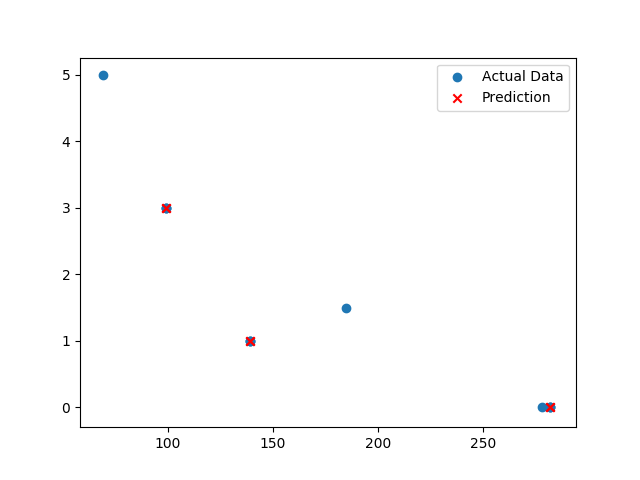

In [93]:
pred = lin_reg.predict(X_test)
plt.figure()
plt.scatter(X_train, y_train, label='Actual Data')
plt.scatter(X_test, pred, marker='x', color='r', label='Prediction')
# plt.scatter(X_train, y)
plt.legend()
plt.savefig('Lin_reg_test_vs_train.png')

In [125]:
y_value = np.array(y_test)
for i in range(len(y_test)):
    print(y_value[i], pred[i])

[4.  1.5 0. ] [3. 1. 0.]
[3. 2. 0.] [3. 1. 0.]


In [92]:
print('(Linear Regression) linear model coeff (w):\n{}'
     .format(lin_reg.coef_))
# print('(poly deg 2) linear model intercept (b): {:.3f}'
#      .format(lin_reg.intercept_))
print('(Linear Regression) R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('(Linear Regression) R-squared score (test): {:.3f}\n'
     .format(lin_reg.score(X_test, y_test)))

(Linear Regression) linear model coeff (w):
[[-0.01978892  0.03034301 -0.00263852]
 [-0.00494723  0.00758575 -0.00065963]
 [ 0.          0.          0.        ]]
(Linear Regression) R-squared score (training): 1.000
(Linear Regression) R-squared score (test): -2.600



In [99]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

0.6123724356957941

<IPython.core.display.Javascript object>


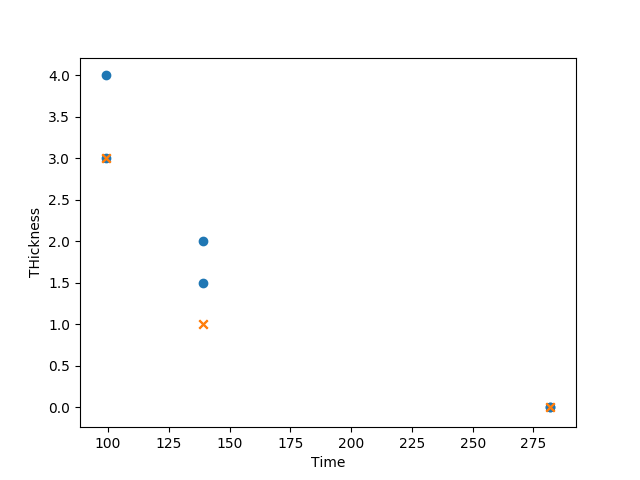

Text(0, 0.5, 'THickness')

In [105]:
plt.figure()
plt.scatter(X_test, y_test)
plt.scatter(X_test, pred, marker='x')
plt.xlabel('Time')
plt.ylabel('THickness')

[ 99. 139. 282.  99. 139. 282.  69. 185. 278.  99. 139. 282.]
[3.  1.  0.  3.  1.  0.  5.  1.5 0.  3.  1.  0. ]


<IPython.core.display.Javascript object>


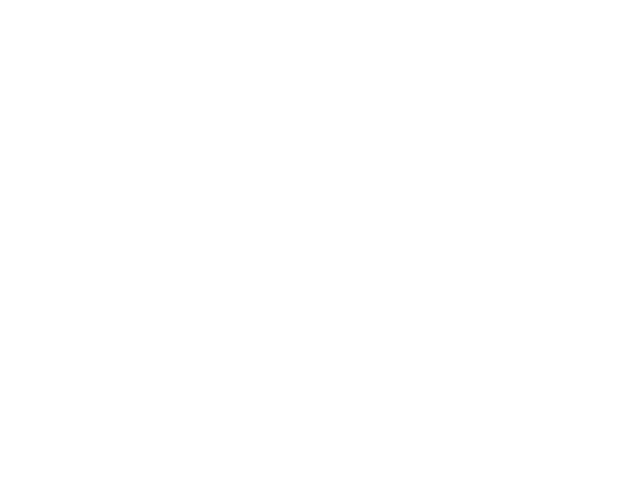

KeyError: '[ 99. 139. 282.  99. 139. 282.  69. 185. 278.  99. 139. 282.] not in index'

In [120]:
train_frame = pd.concat([X_train, y_train], axis=1)
_x = X_train.values.ravel()
_y = y_train.values.ravel()
print(_x)
print(_y)
test_frame = pd.concat([X_test, y_test], axis=1)
plt.figure()
sns.lmplot(data = train_frame, x=X_train[_x],
           y = _y,fit_reg=True)


In [115]:
df.values.ravel?

In [129]:
prediction = pd.DataFrame(pred)
compare = pd.concat([y_test, prediction], axis=0)
# compare.columns = ['Truth', 'Prediction']
# compare

In [130]:
compare

,ThickD1,ThickD2,ThickD3,0,1,2
38,4.0,1.5,0.0,NaN,NaN,NaN
63,3.0,2.0,0.0,NaN,NaN,NaN
0,NaN,NaN,NaN,3.0,1.0,0.0
1,NaN,NaN,NaN,3.0,1.0,0.0
